In [2]:
# Importing neccarcry library

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.pipeline import make_pipeline

In [3]:
# Importing Data and Printing Out Data

df = pd.read_csv('data.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# get info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop unneccessary columns 

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

# Rename column name for making more undersatndable

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [6]:
# Encoding Target Column

encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df.Target)

In [7]:
# printing Dataset

df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
# See if there any null values of or not

df.isna().sum()

Target    0
Text      0
dtype: int64

In [9]:
# See if there any duplicate item or not

df.duplicated().sum()

403

In [10]:
# Removing Duplicate iteam and reseeting index

df = df.drop_duplicates(keep='first')
df.reset_index(drop=True,inplace=True)
df.shape

(5169, 2)

In [11]:
# count how much spam and ham email to be there

df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

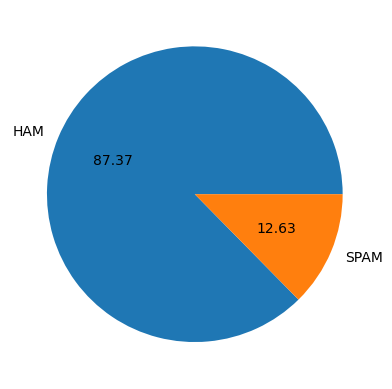

In [12]:
# Make pie chart for the same

plt.pie(df['Target'].value_counts(), labels=['HAM','SPAM'],autopct="%0.2f")
plt.show()

In [13]:
# download nltk punkt for counting word and sentance are in mail

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sphar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Make column that defines how many char to be there

df['num_char'] = df.Text.apply(len)

C:\Users\sphar\AppData\Local\Temp\ipykernel_7948\2313209594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df.Text.apply(len)


In [15]:
# Make column that defines how many word to be there

df['num_word'] = df.Text.apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\sphar\AppData\Local\Temp\ipykernel_7948\2688422279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df.Text.apply(lambda x : len(nltk.word_tokenize(x)))


In [16]:
# Make column that defines how many sentance to be there

df['num_sent'] = df.Text.apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\sphar\AppData\Local\Temp\ipykernel_7948\1511111919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df.Text.apply(lambda x : len(nltk.sent_tokenize(x)))


In [17]:
# Preview our data

df

,Target,Text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,0,The guy did some bitching but I acted like i'd...,125,27,1


C:\Users\sphar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


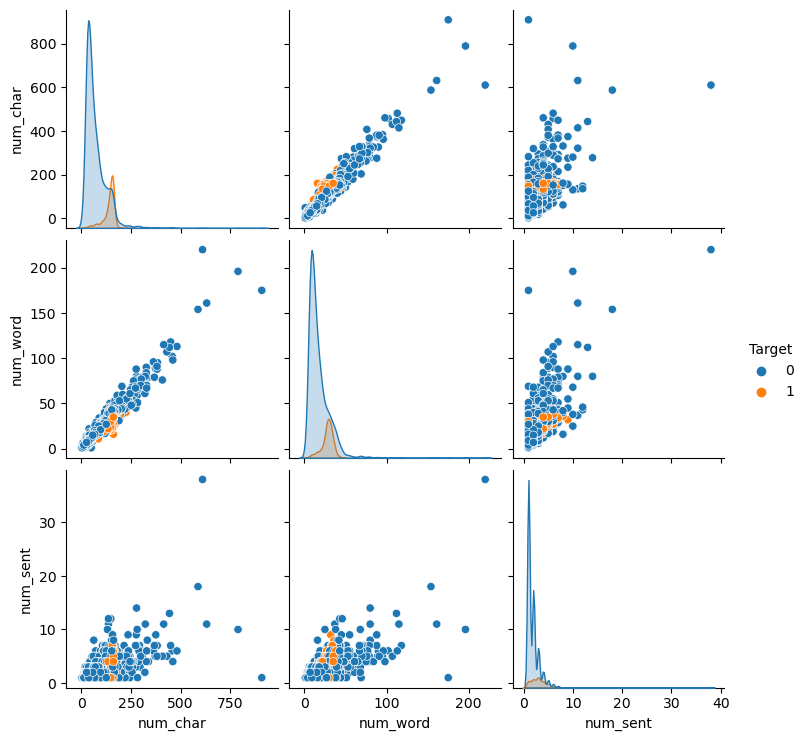

In [18]:
# Drae pairplot to see data distribution

sns.pairplot(df,hue='Target')

<Axes: xlabel='num_char', ylabel='Count'>

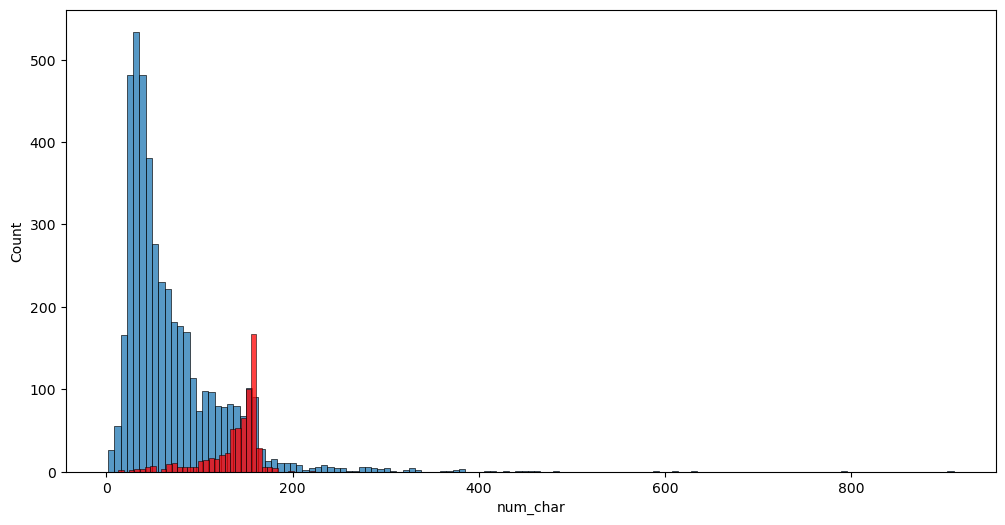

In [19]:
# to comapre number of charcacter in Spam and Ham mail

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_char'])
sns.histplot(df[df['Target'] == 1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

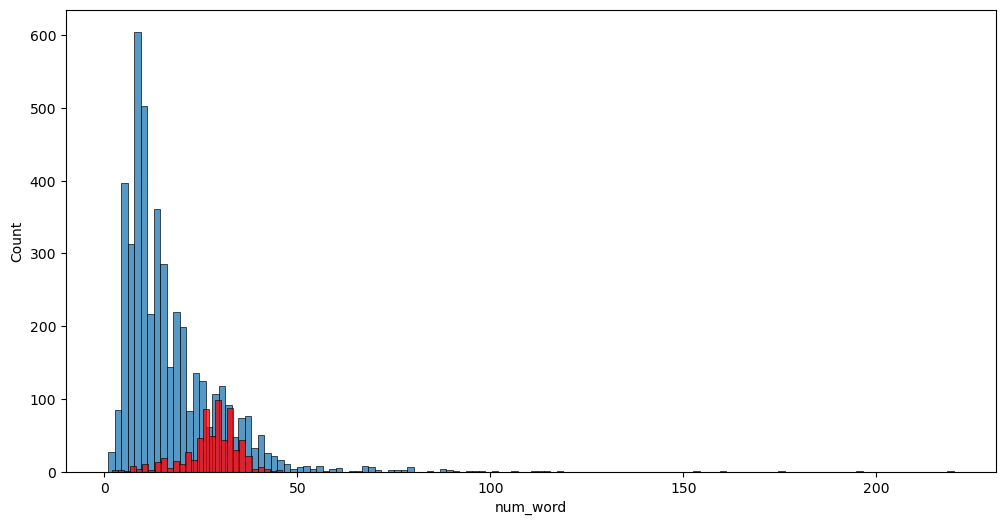

In [20]:
# to comapre number of word in Spam and Ham mail

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_word'])
sns.histplot(df[df['Target'] == 1]['num_word'],color='red')

<Axes: >

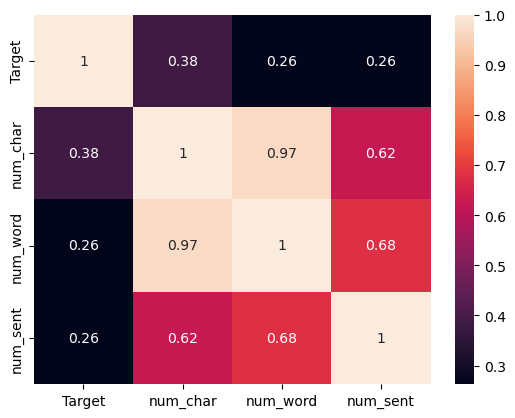

In [21]:
# to see correlation between columns

sns.heatmap(df.drop('Text',axis=1).corr(),annot=True)

In [22]:
# Download Stopwords for removing it 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sphar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# See what sorts of stop words we have in nltk

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# stemming function to do text stem

def stemming(content):
  # remove numric and special charcater
  stemmed_content = re.sub('[^a-zA-Z]',' ',content) 
  port_stem = PorterStemmer()
  # mkaing content in lower case  
  stemmed_content = stemmed_content.lower()
  # split data to bring it in list 
  stemmed_content = stemmed_content.split()
  # collect word which is not in stopword and stem it   
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  # join that words  
  stemmed_content = ' '.join(stemmed_content)
  # return content that we get last  
  return stemmed_content

In [25]:
# apply stemming in text data

df['Text'] = df['Text'].apply(stemming)

C:\Users\sphar\AppData\Local\Temp\ipykernel_7948\3438552838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(stemming)


In [26]:
# Now Calssify data in X and y

X = df.Text.values
y = df.Target.values

In [27]:
# Covert text into array

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X).toarray()

In [28]:
# see the shape of X after transformaton

X.shape

(5169, 3000)

In [29]:
# Split Data in Training and testing Dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [30]:
# Import Neccessary Model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [31]:
# Making Object of that model

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [32]:
# dictionary to make our path easy

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [33]:
# function for fitting model adn find various accuracy score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [34]:
# Now apply that function to all our model and see accuracy

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9696969696969697
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
For  DT
Accuracy -  0.9506769825918762
Precision -  0.8769230769230769
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9661016949152542
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9402985074626866
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8666666666666667
For  ETC
Accuracy -  0.9806576402321083
Precision -  1.0
For  GBDT
Accuracy -  0.9680851063829787
Precision -  0.9754098360655737
For  xgb
Accuracy -  0.9777562862669246
Precision -  0.9632352941176471


In [35]:
# Making  dataframe of it

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.969052,1.000000
5,RF,0.978723,1.000000
8,ETC,0.980658,1.000000
9,GBDT,0.968085,0.975410
0,SVC,0.975822,0.969697
4,LR,0.962282,0.966102
10,xgb,0.977756,0.963235
6,AdaBoost,0.970019,0.940299
3,DT,0.950677,0.876923


In [36]:
# Now make saparte for Accuracy and pricison for graph

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.969052
2,RF,Accuracy,0.978723
3,ETC,Accuracy,0.980658
4,GBDT,Accuracy,0.968085
5,SVC,Accuracy,0.975822
6,LR,Accuracy,0.962282
7,xgb,Accuracy,0.977756
8,AdaBoost,Accuracy,0.970019
9,DT,Accuracy,0.950677


C:\Users\sphar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


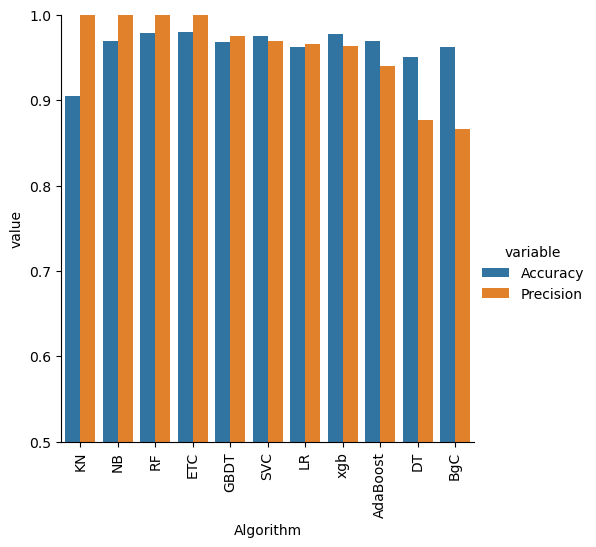

In [37]:
# Draw graph fot see model accuracy and pricison easily

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
# After lots of resarch we found that Random Forest works well so we select it 

final_model = RandomForestClassifier(n_estimators=50, random_state=2)

final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

final_model.score(X_test,y_test)

0.9787234042553191

In [39]:
# Printing Classification report 

print(classification_report(y_pred=y_pred,y_true = y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [40]:
# Predict a random sms

final_model.predict(vectorizer.transform([stemming('''This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.''')]))[0]

1

In [41]:
# Save our model to File

import pickle

pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(final_model,open('model.pkl','wb'))

### When You Want To Use it :

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

data = 'enter message'

###### 1. preprocess
transformed_sms = stemming(data)
###### 2. vectorize
vector_input = tfidf.transform([transformed_sms])
###### 3. predict
result = model.predict(vector_input)[0]